<a href="https://colab.research.google.com/github/sreeja-g/sampling_mc/blob/master/Importance_sampling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importance Sampling


For a function $f(x)$ in interval (0,b),

$$E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_{i} f(x_i)$$
where $ x \sim p(x)$

also,

$$\int f(x) dx = b\int f(x) \frac{1}{b} dx = b\int f(x)p(x) dx$$


where $ x \sim p(x)$ and 
$ p(x) = U(0,b)$

hence,

$$\int f(x) dx = bE[f(x)] \approx b\frac{1}{n}\sum_{i} f(x_i)$$



**Importance Sampling**

$$E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x) dx \approx \frac{1}{n} \sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$

where $ x \sim q(x)$

$$\int f(x) dx = bE[f(x)] \approx b\frac{1}{n}\sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$

where $ x \sim q(x)$

####Using importance sampling here provides a **reduction in the variance** of an integral approximation.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
x = np.linspace(0, 10, 100000) 

In [0]:
def f(x):
    return 10*np.exp(-2*np.abs(x-5))

In [0]:
def p(x):
    return st.uniform(0,10).pdf(x)

def q(x):
    return st.norm(5,1).pdf(x)

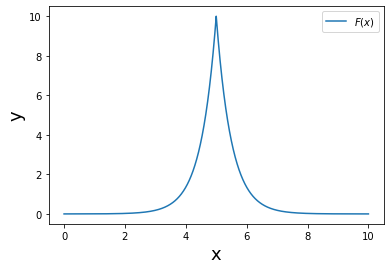

In [5]:
plt.plot(x, f(x), label="$F(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(loc='best')
plt.show()

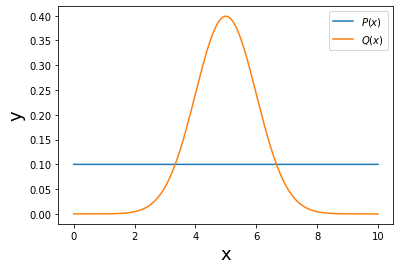

In [6]:
plt.plot(x, p(x), label="$P(x)$")
plt.plot(x, q(x), label="$Q(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(loc='best')
plt.show()

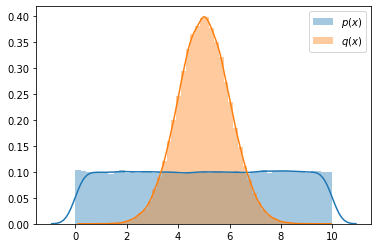

In [7]:
sns.distplot([np.random.uniform(0,10) for _ in range(100000)], label="$p(x)$")
sns.distplot([np.random.normal(5, 1) for _ in range(100000)], label="$q(x)$")

plt.legend()

In [8]:
def sampling_p_x(iter=1000):
    
    samples_p_x = []

    for i in range(iter):
        z = np.random.uniform(0,10)
        
        samples_p_x.append(f(z))

    return np.array(samples_p_x)

p_x_sampling = sampling_p_x(iter=100000)
print("average {} variance {}".format(np.mean(p_x_sampling), np.var(p_x_sampling)))

average 0.9974763912787615 variance 4.000965789468639


In [9]:
print("Approximated Integral value from p(x) : {}".format(10*np.mean(p_x_sampling)))

Approximated Integral value from p(x) : 9.974763912787616


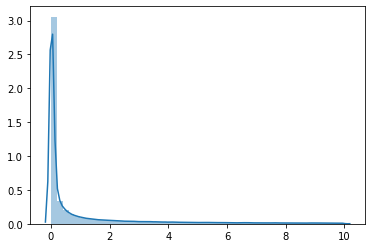

In [10]:
sns.distplot(p_x_sampling)

In [0]:
def importance_sampling(iter=1000):
    
    samples = []

    for i in range(iter):
        z = np.random.normal(5, 1)
        
        samples.append(f(z)*(p(z)/q(z)))

    return np.array(samples)

In [0]:
imp_sampling = importance_sampling(iter=100000)

In [13]:
print("average {} variance {}".format(np.mean(imp_sampling), np.var(imp_sampling)))

average 1.0004736471346702 variance 0.36067750175201263


In [14]:
print("Approximated Integral value from importance sampling: {}".format(10*np.mean(imp_sampling)))

Approximated Integral value from importance sampling: 10.004736471346703


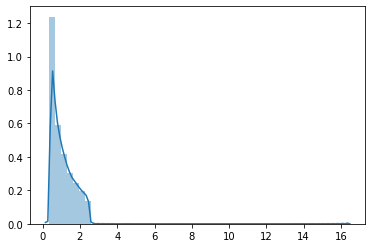

In [15]:
sns.distplot(imp_sampling)

In [16]:
np.trapz(f(x),x=x)

9.999545984033862

In [17]:
np.abs(np.trapz(f(x),x=x)-10*np.mean(p_x_sampling))

0.024782071246246318

In [18]:
np.abs(np.trapz(f(x),x=x)-10*np.mean(imp_sampling))

0.005190487312841441

###Though the integral calculation is still correct, but with a variance this is approximately 1/10 of the simple monte carlo integral approximation
